# Instalando/Importando Bibliotecas

In [ ]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo Dataset

In [8]:
df = pd.read_csv("Amazon.csv", encoding='latin1') # Latin1 serve para reconhecimento do padrão de caractéres.

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


# Checando Valores Nulos

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df.isnull().sum())

year      0
state     0
month     0
number    0
date      0
dtype: int64


# Quantidade de Incêndios por Ano

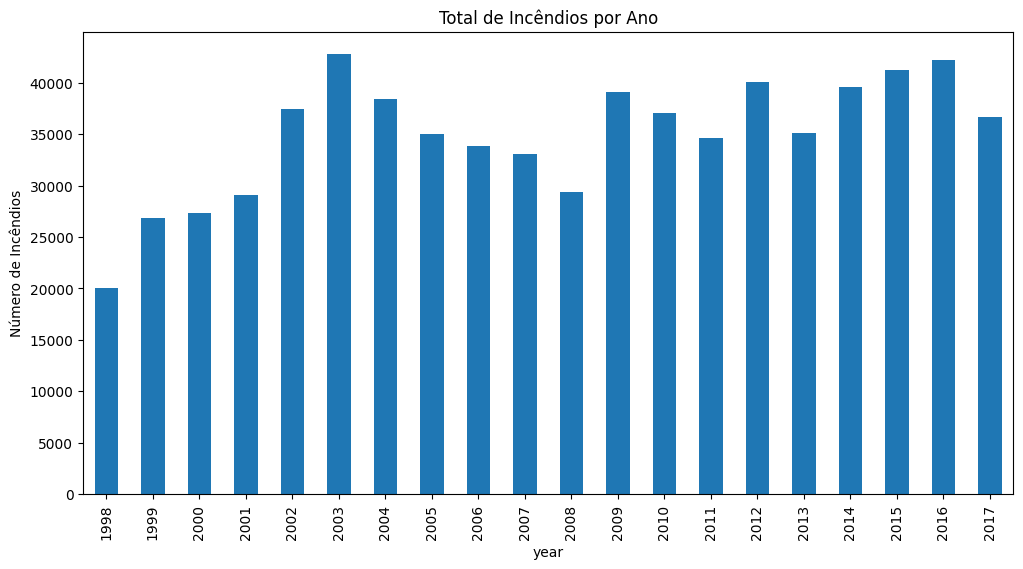

In [7]:
df.groupby('year')['number'].sum().plot(kind='bar', figsize=(12,6), title="Total de Incêndios por Ano")
plt.ylabel("Número de Incêndios")
plt.show()

# Quantidade de Incêndios por Mês

<ipython-input-9-f2edbfacd331>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month')['number'].sum().plot(kind='bar', figsize=(12,6), title="Total de Incêndios por Mês")


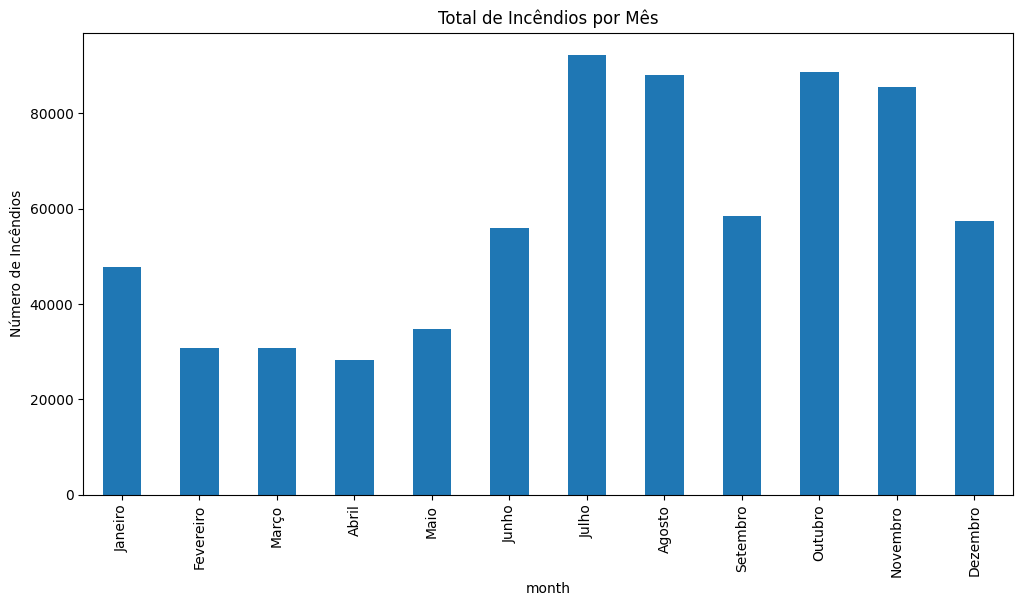

In [9]:
df['month'] = pd.Categorical(df['month'],
    categories=['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'],
    ordered=True)
df.groupby('month')['number'].sum().plot(kind='bar', figsize=(12,6), title="Total de Incêndios por Mês")
plt.ylabel("Número de Incêndios")
plt.show()

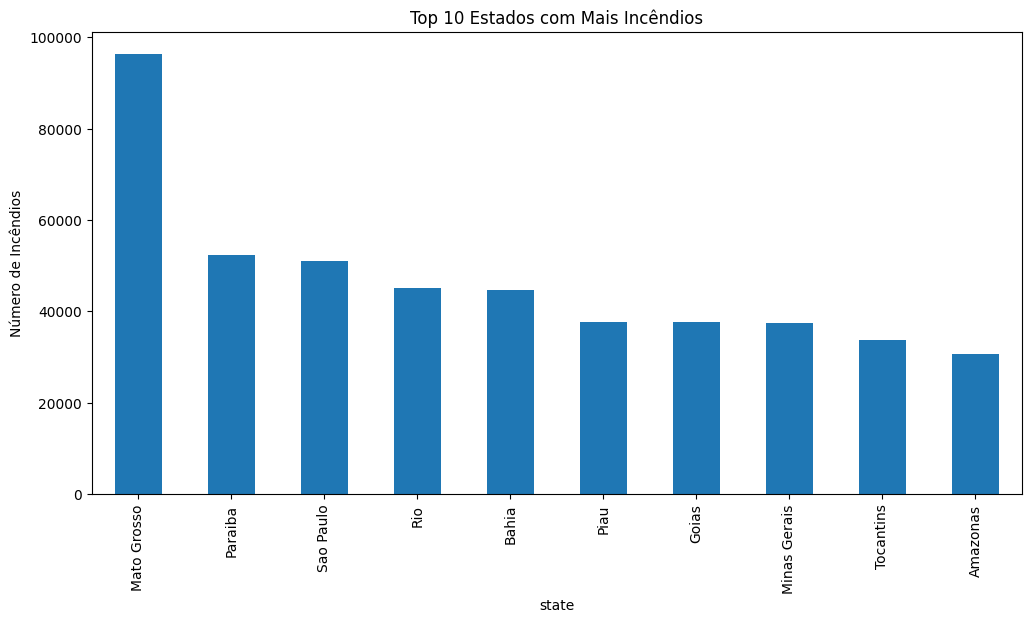

In [10]:
df.groupby('state')['number'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6), title="Top 10 Estados com Mais Incêndios")
plt.ylabel("Número de Incêndios")
plt.show()

# Heatmap

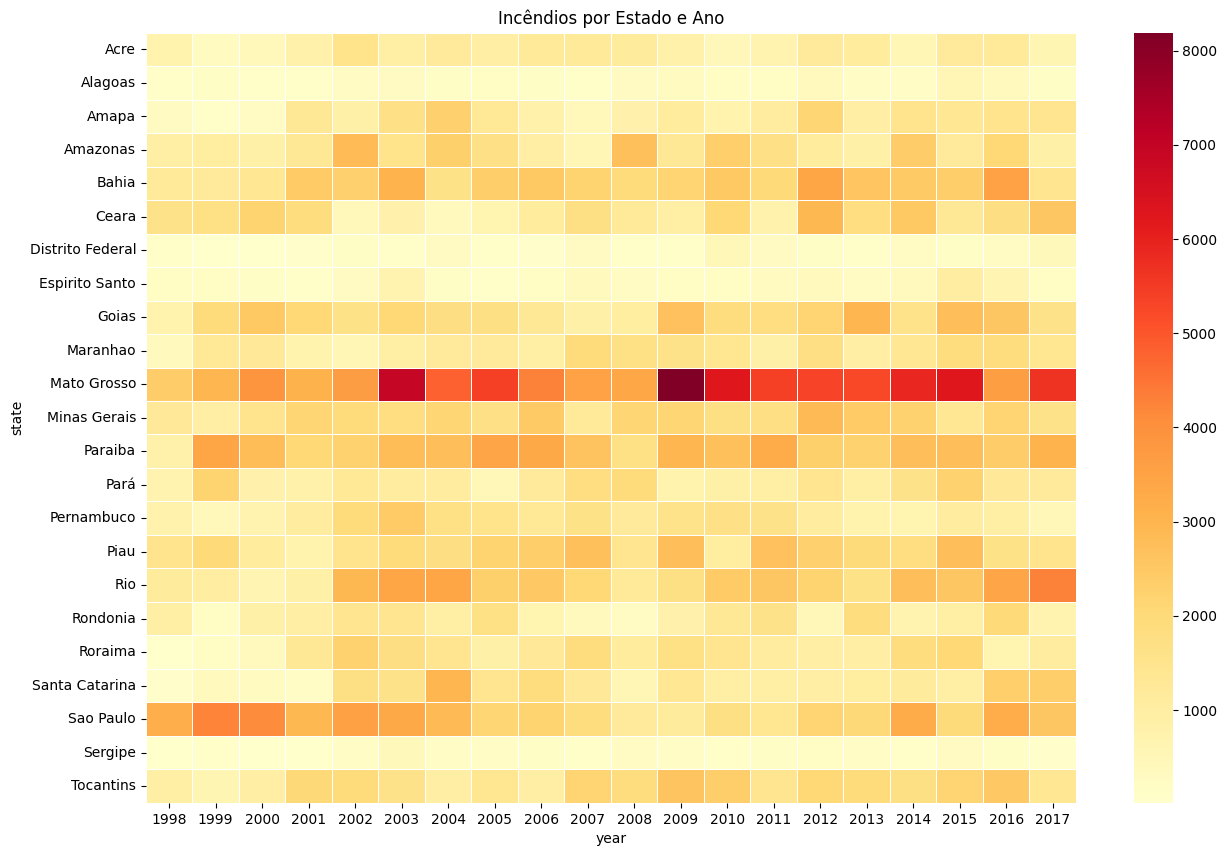

In [11]:
pivot = df.pivot_table(index='state', columns='year', values='number', aggfunc='sum')
plt.figure(figsize=(15,10))
sns.heatmap(pivot, cmap="YlOrRd", linewidths=.5)
plt.title("Incêndios por Estado e Ano")
plt.show()

# On State

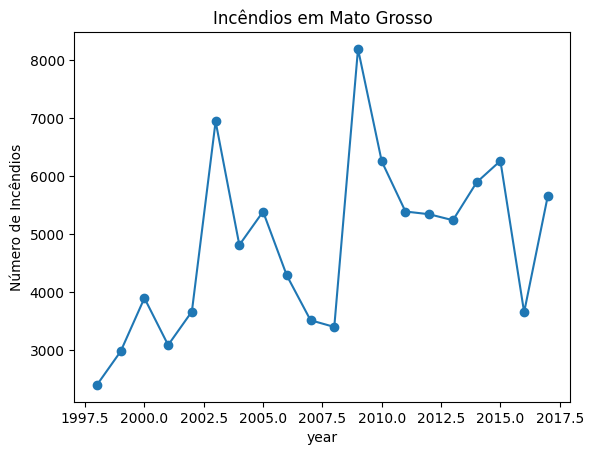

In [12]:
estado_escolhido = "Mato Grosso"
df_estado = df[df['state'] == estado_escolhido]
df_estado.groupby('year')['number'].sum().plot(kind='line', marker='o', title=f"Incêndios em {estado_escolhido}")
plt.ylabel("Número de Incêndios")
plt.show()

# Por Estado Acumulado

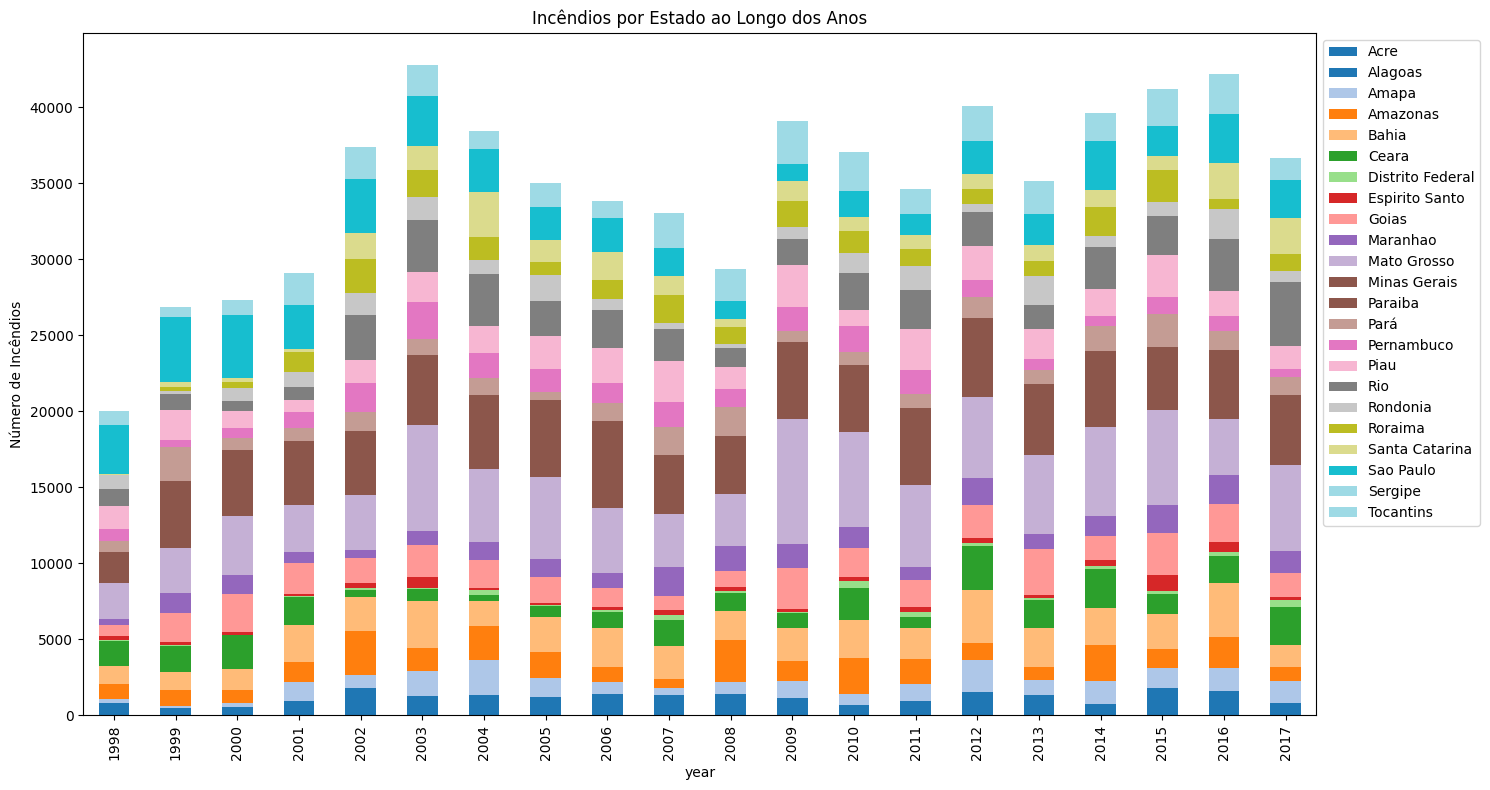

In [18]:
df_pivot = df.pivot_table(index='year', columns='state', values='number', aggfunc='sum').fillna(0)
df_pivot.plot(kind='bar', stacked=True, figsize=(15,8), colormap='tab20')
plt.title("Incêndios por Estado ao Longo dos Anos")
plt.ylabel("Número de Incêndios")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

# Clusterização e PCA

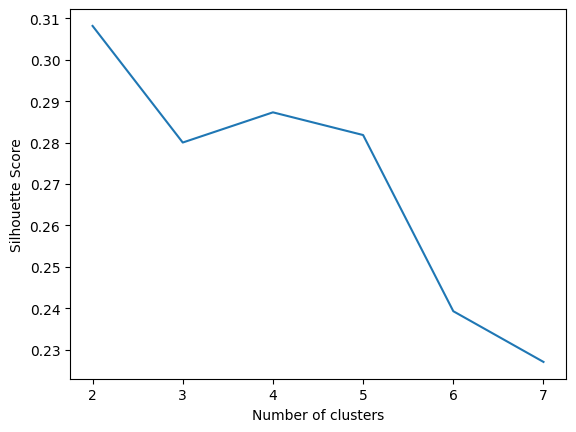

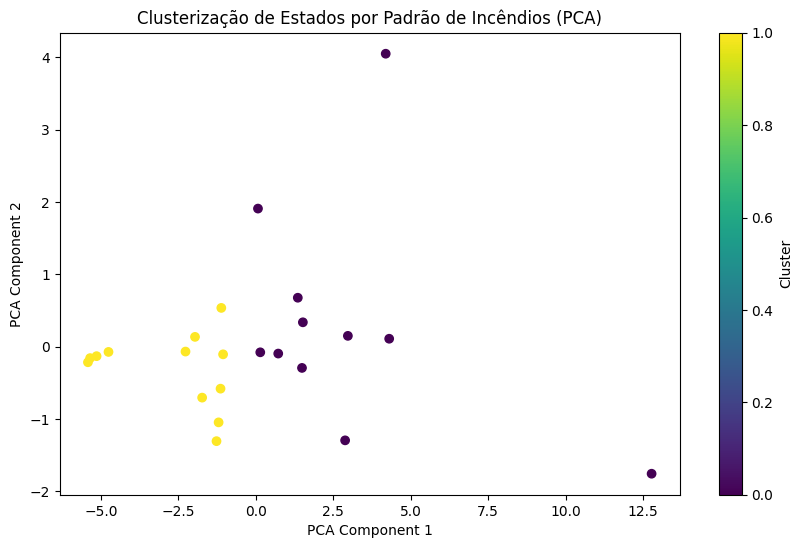

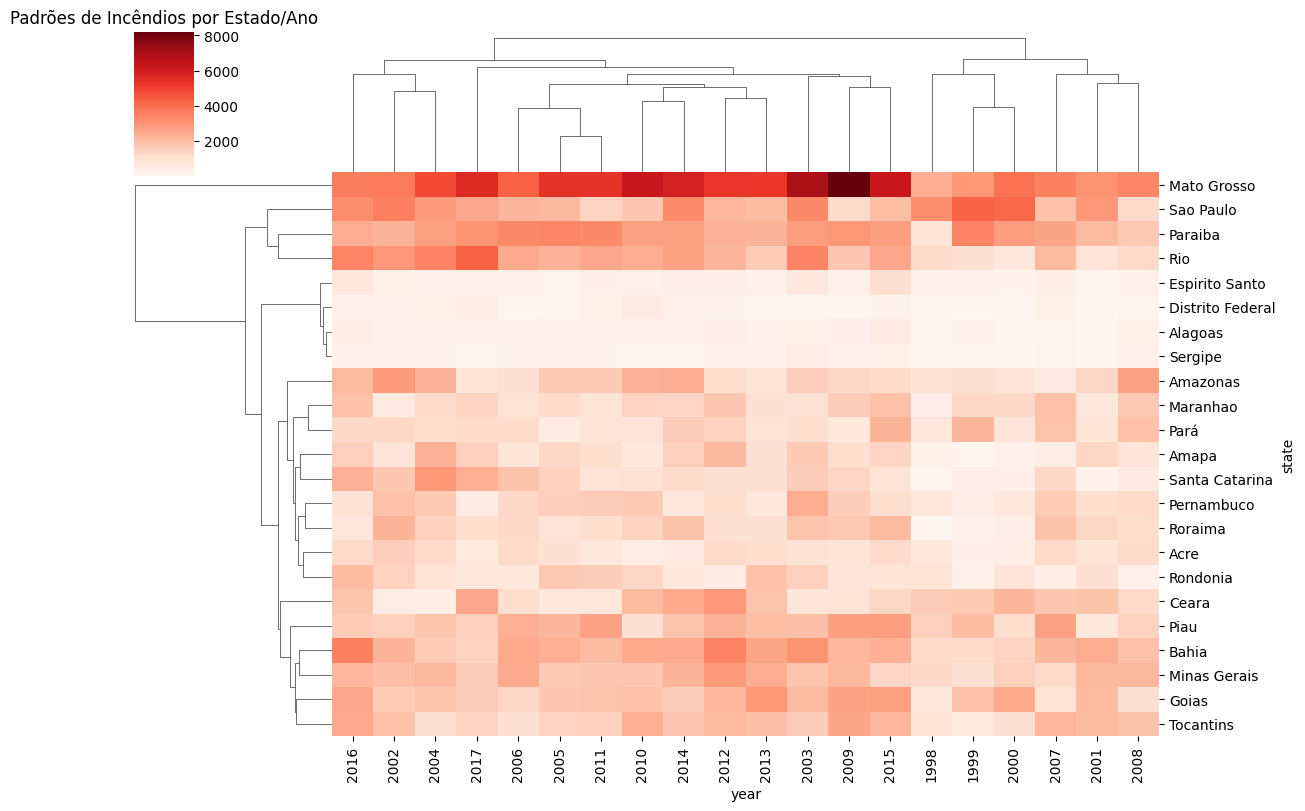

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Pré-processamento
df_kmeans = df.groupby(['state', 'year'])['number'].sum().unstack().fillna(0)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_kmeans)

silhouette_scores = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.plot(range(2, 8), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 porque começamos em 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_kmeans['cluster'] = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_kmeans['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.title('Clusterização de Estados por Padrão de Incêndios (PCA)')
plt.show()

sns.clustermap(df_kmeans.drop('cluster', axis=1), cmap='Reds', figsize=(12, 8))
plt.title('Padrões de Incêndios por Estado/Ano')
plt.show()